In [2]:
%matplotlib inline
import pysal as ps
import numpy as np
from pysal.contrib import pdio
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [ ]:
df = ps.pdio.read_files(ps.examples.get_path('columbus.dbf'))

## How to classify

In [6]:
net_link = ps.examples.get_path('eberly_net.shp')
values = np.array(ps.open(net_link.replace('.shp', '.dbf')).by_col('TNODE'))
hr90 = values
QT_bins = ps.Quantiles(values,5).bins
QT_bins

array([  5.6,  11.4,  16.8,  22. ,  25. ])

In [9]:
QT_yb = ps.Quantiles(values,5).yb
QT_yb

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3,
       4, 4, 4, 3, 4, 4])

### for Pysal

## Boundaries

In [4]:
df = ps.pdio.read_files(ps.examples.get_path('columbus.dbf'))
classifier = ps.Quantiles.make(k=9)
#classification = df[['HOVAL']]
df[['class']] = df[['HOVAL']].apply(ps.Quantiles.make(k=5))

mini = df[['HOVAL','class']].groupby(['class']).agg(['min'])
maxm = df[['HOVAL','class']].groupby(['class']).agg(['max'])
m1 = [i[0] for i in mini.values.tolist()]
m2 = [i[0] for i in maxm.values.tolist()]
ran = zip(m1,m2)
ran

[(17.9, 22.85),
 (23.225, 30.450001),
 (30.6, 37.125),
 (39.599998, 44.567001),
 (47.733002, 96.400002)]

## How to draw plots

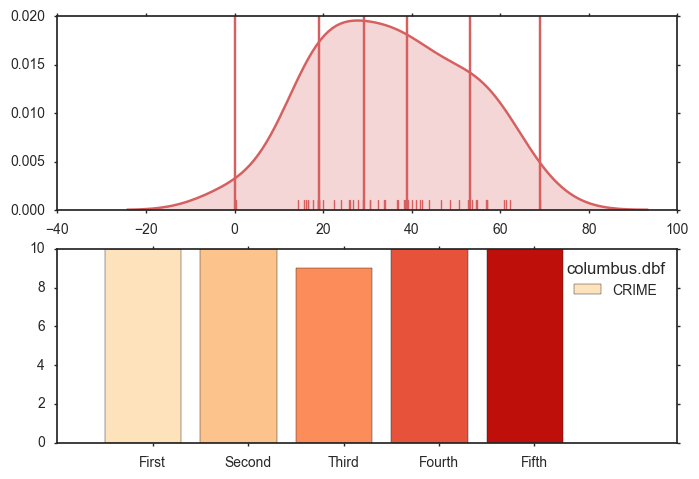

In [5]:
from itertools import groupby
class Plotting (Classifications):
    def __init__(self, shape_name, attribute, k, color):
        Classifications.__init__(self, shape_name, attribute, k)
        self.color = color
    def distribution(self,cla_method):
        if cla_method == 'QT':
            clalines = Classifications.quantiles(self)
        if cla_method == 'EI':
            clalines = Classifications.equal_interval(self)
        if cla_method == 'NB':
            clalines = Classifications.natural_breaks(self)
        if cla_method == 'MSD':
            clalines = sClassifications.mean_standard_deviation(self)
        
        sns.set(palette="muted", color_codes=True)
        sns.set_style("ticks", {"xtick.major.size": 2, "ytick.major.size": 2})
        c = clalines.tolist()
        c.append(min(self.data))
        
        plt.subplot(2,1,1)
        for i in c:
            plt.axvline(x=i,color = self.color)
        fig1 = sns.distplot(self.data, hist=False,rug=True,kde_kws={"shade": True},color=self.color)
        #plt.legend(fig1, [aaa], loc = "upper right", title = self.shape_name)

        plt.subplot(2,1,2)
        a = Classifications.judge(self, cla_method)
        a.sort()
        field = [len(list(group)) for key, group in groupby(a)]
        x=self.k
        y=field
        sns.set_context(rc={"figure.figsize": (8, 4)})
        nd = np.arange(x)
        width=1
        plt.xticks(nd+width/2., ('First','Second','Third','Fourth','Fifth', 'Sixth','Seveth','Eighth','Nineth'))
        plt.xlim(-0.5,self.k+1)
        fig = plt.bar(nd, y, color=sns.color_palette('OrRd',self.k))
        plt.legend(fig, [self.attribute], loc = "upper right", title = self.shape_name)
        plt.show()
    def legend(self,cla_method):
        pass
    
p = Plotting('columbus.dbf','CRIME', 5, 'r')
p.distribution('QT')

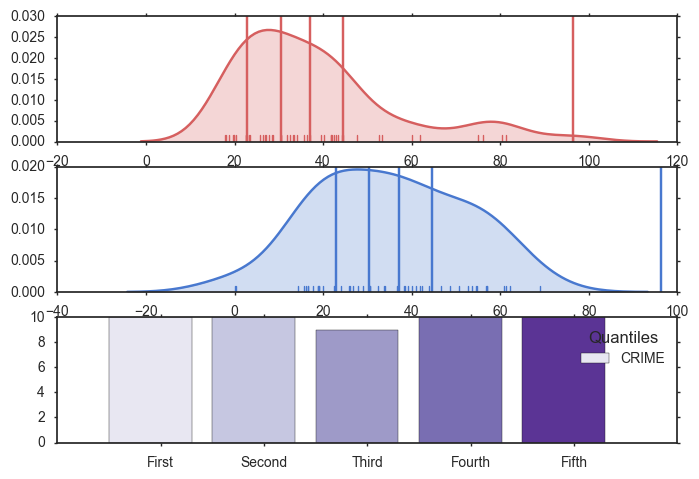

In [6]:
df1 = ps.pdio.read_files(ps.examples.get_path('columbus.dbf'))['HOVAL']
df2 = ps.pdio.read_files(ps.examples.get_path('columbus.dbf'))['CRIME']
field1 = []
field2 = []
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_style("ticks", {"xtick.major.size": 2, "ytick.major.size": 2})

for data1,data2 in zip(df1.values.tolist(),df2.values.tolist()):
    field1.append(data1)
    field2.append(data2)

plt.subplot(3,1,1)
for i in m2:
    plt.axvline(x=i,color = 'r')
#ax.get_yaxis().set_visible(False)
#fig = plt.bar(nd, y, color=sns.color_palette("Greens_d"))
fig1 = sns.distplot(field1,hist=False,rug=True,kde_kws={"shade": True},color="r")

plt.subplot(3,1,2)
for i in m2:
    plt.axvline(x=i,color = 'b')
fig2 = sns.distplot(field2,hist=False,rug=True,kde_kws={"shade": True},color="b");

plt.subplot(3,1,3)
def read_filed(name = 'columbus.dbf',filed = 'CRIME', classification = 'Quantiles', k = 5, color = "Greens_d"):
    df = ps.pdio.read_files(ps.examples.get_path('columbus.dbf'))
    df[['class']] = df[['HOVAL']].apply(ps.Quantiles.make(k=5))
    #df.head()
    classifications = df[['HOVAL','class']].groupby(['class']).agg(['count'])# ?? what is k??
    cla = classifications.head()
    field = []
    for data in classifications.values.tolist():
        field.append(data[0])
    x=5
    y=field
    sns.set_context(rc={"figure.figsize": (8, 4)})
    nd = np.arange(x)
    width=1
    plt.xticks(nd+width/2., ('First','Second','Third','Fourth','Fifth'))
    plt.xlim(-0.5,5.5)
    fig = plt.bar(nd, y, color=sns.color_palette(color,5))
    plt.legend(fig, [filed], loc = "upper right", title = classification)
    plt.show()
    return field

a = read_filed(name = 'columbus.dbf',filed = 'CRIME', classification = 'Quantiles', k = 8, color = "Purples")

## Legend

In [7]:
from matplotlib.colors import LinearSegmentedColormap

In [8]:
x = np.arange(0, 10, 1)
y = np.arange(0, 9, 1)[::-1]
X,Y = np.meshgrid(x, y)
Z = X + Y
Z

array([[ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9]])

In [9]:
#get_ipython().magic(u'matplotlib inline')

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mpc

#from ipywidgets import Dropdown, RadioButtons,  HBox, interact
from IPython.display import display
from pysal.contrib.viz import mapping as maps
from pysal.contrib.viz.color import get_maps_by_type
from pysal.contrib.viz.color import qualitative, sequential, diverging
from pysal.contrib.viz.color import get_color_map

ctypes = (sequential, diverging, qualitative)
color_display_types = {}
for ctype in ctypes:
    cmaps = get_maps_by_type(ctype)
    ctype_name = ctype.__name__.split(".")[-1]
    displays = {}
    for cmap in cmaps:
        cmap = cmap.split("_")[0]
        if cmap not in displays:
            c = get_color_map(cmtype=ctype_name, name=cmap)
            displays[cmap] = c
    color_display_types[ctype_name] = displays

In [13]:
import palettable as pltt
from palettable.colorbrewer import qualitative, sequential, diverging


def _build_pltt2type():
    types = ['sequential', 'diverging', 'qualitative']
    pltt2type = {}
    for t in types:
        pals = list(set([
            p.split('_')[0] for p in dir(getattr(pltt.colorbrewer, t))
                            if p[0]!='_'
                            ]))
        pals = pals + [p+'_r' for p in pals]
        for p in pals:
            pltt2type[p.lower()] = t
    return pltt2type

pltt2type = _build_pltt2type()

def get_maps_by_type(data_type):
    names = [name for name in dir(data_type) if not name.startswith('_')]
    return names

def get_color_map(palette=None, name='BuGn', cmtype='sequential', k=5,
                  color_encoding='rgb'):
    encs = {'hex': 'hex_colors',
            'rgb': 'colors',
            'mpl': 'mpl_colors',
            'mpl_colormap': 'mpl_colormap'}
    if not palette:
        cmtype = pltt2type[name.lower()]
        if name[-2:] == '_r':
            palette = pltt.colorbrewer.get_map(name[:-2], cmtype,
                    k, reverse=True)
        else:
            palette = pltt.colorbrewer.get_map(name, cmtype, k)
    colors = getattr(palette, encs[color_encoding.lower()])
    return colors
a= np.array(get_color_map(name='Blues'))
a

array([[239, 243, 255],
       [189, 215, 231],
       [107, 174, 214],
       [ 49, 130, 189],
       [  8,  81, 156]])

In [14]:
b = np.array(get_color_map(name='RdPu'))
b

array([[254, 235, 226],
       [251, 180, 185],
       [247, 104, 161],
       [197,  27, 138],
       [122,   1, 119]])

In [15]:
import struct
legend = []
for con2, belt in enumerate(b):
    cls = []
    for con1, hue in enumerate(a):
        rgb = (belt + hue)/2
        c = '#' + struct.pack('BBB',*rgb).encode('hex')
        cls.append(c)
    legend.append(cls)
leg = legend

NameError: global name 'mpc' is not defined

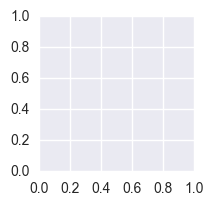

In [16]:
import matplotlib.colors as colors

def bipcmaps(dtype, ):
    fig = plt.figure(figsize=(2, 2))
    w = h = 0.2
    ax = fig.add_subplot(111, aspect='equal')
    for i, cmap in enumerate(legend):
        for j, clr in enumerate(cmap):
            #c = colors.
            c = mpc.hex2color(clr)
            p = patches.Rectangle((i/5.,j/5.), w, h, fill=True, color=c)
            ax.add_patch(p)
            ax.set_xlabel(self.attribute)
            ax.set_ylabel(attribute2)
            
            #plt.tick_params(
                #axis='x',          # changes apply to the x-axis
                #which='both',      # both major and minor ticks are affected
                #bottom='off',      # ticks along the bottom edge are off
                #top='off')         # ticks along the top edge are off# labels along the bottom edge are off
            #lablex = [str(int(i)) for i in self.clalines.tolist()]
            #labley = [str(int(i)) for i in Plotting(self.shape_name, self.cla_method, attribute2, self.k).clalines.tolist()]
            #ax.set_xticks(lablex)
            #ax.set_yticks(labley)
            #plt.xticks(x,lablex[j],rotation='vertical')
            #plt.yticks(x,labley[i])
    
bipcmaps('sequential')

NameError: name 'ax' is not defined

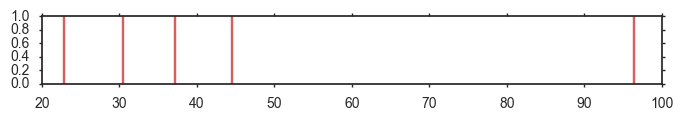

In [14]:
plt.subplot(4,1,1)
df1 = ps.pdio.read_files(ps.examples.get_path('columbus.dbf'))['HOVAL']
df2 = ps.pdio.read_files(ps.examples.get_path('columbus.dbf'))['CRIME']
field1 = []
field2 = []
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_style("ticks", {"xtick.major.size": 2, "ytick.major.size": 2})
#
for i in m2:
    plt.axvline(x=i,color = 'r')
#
for data1,data2 in zip(df1.values.tolist(),df2.values.tolist()):
    field1.append(data1)
    field2.append(data2)
    
ax.get_yaxis().set_visible(False)
#fig = plt.bar(nd, y, color=sns.color_palette("Greens_d"))
fig1 = sns.distplot(field1,hist=False,rug=True,kde_kws={"shade": True},color="r");
plt.subplot(4,1,2)
def bipcmaps(dtype = 'sequential'):
    fig = plt.figure(figsize=(2, 2))
    w = h = 0.2
    ax = fig.add_subplot(111, aspect='equal')
    for i, cmap in enumerate(legend):
        for j, clr in enumerate(cmap):
            c = mpc.hex2color(clr)
            p = patches.Rectangle((i/5.,j/5.), w, h, fill=True, color=c)
            ax.add_patch(p)
bipcmaps()
plt.subplot(4,2,2)
for i in m2:
    plt.axvline(x=i,color = 'b')
fig2 = sns.distplot(field2,hist=False,rug=True,kde_kws={"shade": True},color="b");

## Choropleth Mapping

In [44]:
c1 = Classifications('columbus.dbf', 'CRIME', 5)
classification1 = c1.judge('QT')
classification1.sort()
classification1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [45]:
c2 = Classifications('columbus.dbf', 'HOVAL', 5)
classification2 = c2.judge('QT')
classification2.sort()
classification2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [46]:
leg

[['#f6eff0', '#dde1e4', '#b4ccdc', '#97b6cf', '#839ebf'],
 ['#f5d3dc', '#dcc5d0', '#b3b1c7', '#969bbb', '#8182aa'],
 ['#f3add0', '#da9fc4', '#b18bbb', '#9475af', '#7f5c9e'],
 ['#da87c4', '#c179b8', '#9864b0', '#7b4ea3', '#663693'],
 ['#b47abb', '#9b6caf', '#7257a6', '#55419a', '#412989']]

In [63]:
import geopandas as gpd
from bokeh.plotting import figure, output_file, show

df = gpd.read_file(ps.examples.get_path('columbus.shp'))
def gpd_bokeh(df):
    """Convert geometries from geopandas to bokeh format"""
    #nan = float('nan')
    lons = []
    lats = []
    for i,shape in enumerate(df.geometry.values):
        xy = np.array(list(shape.exterior.coords))
        xs = xy[:,0].tolist()
        ys = xy[:,1].tolist()
        lons.append(xs)
        lats.append(ys) 

    return lons,lats

a,b = gpd_bokeh(df)
colors = []
for i in range(len(leg)):
    for m, color1 in enumerate(classification1):
        if color1 == i:
            #color2 = 0
            color2 = classification2[m]
            colors.append(leg[color1][color2])
        
p = figure(title="Texas", toolbar_location='left',
          plot_width=1100, plot_height=700)
p.patches(a,b, fill_alpha=0.7, fill_color=colors,
         line_color="#884444", line_width=2, line_alpha=0.3)
output_file('choropleth.html', title="choropleth.py example")
show(p)

INFO:bokeh.core.state:Session output file 'choropleth.html' already exists, will be overwritten.


In [28]:
from bokeh.io import show
from bokeh.models import (ColumnDataSource, HoverTool, LogColorMapper)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

palette.reverse()

counties = {code: county for code, county in counties.items() if county["state"] == "tx"}
print(type(counties))
county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
print(county_names[:10])
color_mapper = LogColorMapper(palette=palette)

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
))
print(type(source))
TOOLS = "pan,wheel_zoom,box_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

#show(p)

<type 'dict'>
['Montague', 'Brewster', 'Eastland', 'Lee', 'Willacy', 'Cass', 'Hood', 'Tarrant', 'Anderson', 'Foard']
<class 'bokeh.models.sources.ColumnDataSource'>


In [ ]:
for n in range(len(classification1)):
    for i in range(len(leg)):
        if classification1[n] == i:
            j = classification2[n]
            colors = leg[i][j]
            print(i,j)
        